In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

import re
from scipy.stats import pearsonr

In [3]:
train = pd.read_csv('df_training_scholarjet.csv', index_col='cuid').drop('Unnamed: 0', axis='columns')
test = pd.read_csv('df_holdout_scholarjet.csv', index_col='cuid').drop('Unnamed: 0', axis='columns')

# Data Exploration

In [29]:
pd.options.display.max_rows = 250

In [30]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
convert_30,28126.0,0.104103,0.305399,0.000000,0.000000,0.000000,0.000000,1.000000e+00
revenue_30,28126.0,75.038997,508.874716,0.000000,0.000000,0.000000,0.000000,3.498669e+04
numorderone,9702.0,0.022367,0.153355,0.000000,0.000000,0.000000,0.000000,3.000000e+00
numorderthreeone,9702.0,0.037827,0.205360,0.000000,0.000000,0.000000,0.000000,4.000000e+00
numorderseventhree,9702.0,0.078231,0.298023,0.000000,0.000000,0.000000,0.000000,5.000000e+00
numorderthirtyseven,9702.0,0.336425,0.712727,0.000000,0.000000,0.000000,1.000000,1.600000e+01
numordersixtythirty,9702.0,0.337044,0.814508,0.000000,0.000000,0.000000,0.000000,1.800000e+01
numorderyearsixty,9702.0,1.323954,2.041241,0.000000,0.000000,1.000000,2.000000,5.700000e+01
sumrevone,9702.0,10.836336,116.215514,0.000000,0.000000,0.000000,0.000000,3.799450e+03
sumrevthreeone,9702.0,17.994792,172.346870,0.000000,0.000000,0.000000,0.000000,8.004060e+03


In [ ]:
train.head()

In [4]:
train.dtypes

convert_30                        int64
revenue_30                      float64
roll_up                          object
currentstatus                    object
companytypegroup                 object
team                             object
customersource                   object
accrole                          object
num_employees                    object
num_purchases_year               object
cost_purchases_year              object
enrollmentmethod                 object
numorderone                     float64
numorderthreeone                float64
numorderseventhree              float64
numorderthirtyseven             float64
numordersixtythirty             float64
numorderyearsixty               float64
sumrevone                       float64
sumrevthreeone                  float64
sumrevseventhree                float64
sumrevthirtyseven               float64
sumrevsixtythirty               float64
sumrevyearsixty                 float64
numbamorder                     float64


In [5]:
[print(train[col].value_counts() , '\n\n') for col in train.loc[:, 'roll_up':'enrollmentmethod']]

Unmanaged     14748
Onboarding     9986
Retention      3392
Name: roll_up, dtype: int64 


Enrolled       18199
Active          9918
In Progress        8
Unconfirmed        1
Name: currentstatus, dtype: int64 


Business    22748
Trade        5378
Name: companytypegroup, dtype: int64 


US    25799
CA     2327
Name: team, dtype: int64 


Internal Application        10888
Internal Customer Scrape     5849
Social - Paid                3203
External Application         3032
Search - Paid                2113
Affiliates                   1523
Other                         904
Referral                      300
Bulk Upload                   124
Email                         105
Display - Acquisition          27
Quotes                         20
Gateway                        19
Display - Retargeting          14
Self ID                         3
Partners                        2
Name: customersource, dtype: int64 


None         14849
Primary      10484
Purchaser     2747
Other           46
Na

[None, None, None, None, None, None, None, None, None, None]

# Data Cleaning

In [37]:
threshold = train.revenue_30.mean() + 3 * train.revenue_30.std()
percent_outliers = train[train.revenue_30 > threshold].shape[0] / train[train.revenue_30 < threshold].shape[0] * 100
print("Percent outliers: ", round(percent_outliers, 2))

Percent outliers:  1.13


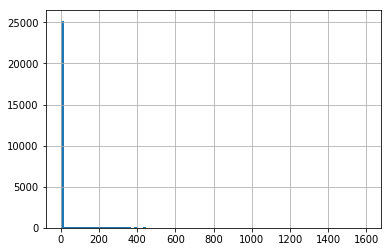

In [41]:
train[train.revenue_30 < threshold].revenue_30.hist(bins=100)

/Users/kylemaxwell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


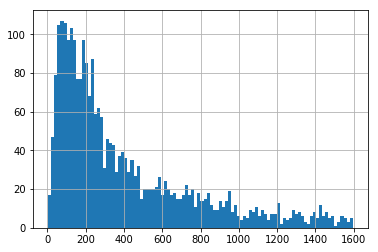

In [40]:
train[train.revenue_30 != 0][train.revenue_30 < threshold].revenue_30.hist(bins=100)

In [43]:
train_clean = train[train.revenue_30 < threshold]

In [7]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [8]:
def forwards_stepwise_metric(X, y, metric_type, numvar):
    best_vars = []
    metric_list = []
    left_to_check = list(X.columns)
    
    while len(best_vars) < numvar:
        if metric_type == "bic":
            best_metric = np.inf
        elif metric_type == "r2_adj":
            best_metric = -1
        best_variable = None
        
        # get metric of each additional variable
        for new_var in left_to_check:
            X_vars = X[best_vars + [new_var]]
            bias = pd.Series([1 for _ in range(X_vars.shape[0])])
            X_vars = pd.concat([X_vars, bias], axis = 1)
            model = sm.OLS(exog = X_vars, endog = y) #, missing = "drop")
            results = model.fit()
            
            if metric_type == "bic":
                metric = results.bic
                # find the variable with the best bic after adding it to a list of already best variables
                if metric < best_metric:
                    best_metric = metric
                    best_variable = new_var
            
            elif metric_type == "r2_adj":
                metric = results.rsquared_adj
                # find var w/ best r2 after adding to list of already chosen variables
                if metric > best_metric:
                    best_metric = metric
                    best_variable = new_var
                    
        # add the new variable to the list and its corresponding metric
        best_vars.append(best_variable)
        metric_list.append(best_metric)
        
        # remove the selected variable from consideration
        left_to_check.remove(best_variable)
        
    return best_vars, metric_list

In [9]:
def plot_metric(names, m):
    fig = plt.figure(figsize = (12, 8))
    ax = plt.plot(range(len(names)), m)
    _ = plt.xticks(range(len(names)), names, rotation = 45, ha = "right", fontsize = 12)
    plt.xlabel("Variables")
    plt.ylabel("")
    plt.savefig("tempresults", dpi = 300)
    plt.show()

# Prepare Independent Variables


In [44]:
# Dummify Categorical Variables
train_prepared = pd.get_dummies(train_clean).reset_index()

In [ ]:
# Normalize
# train2 = normalize(train2)

In [45]:
X = train_prepared[[col for col in train_prepared.columns if col not in ['cuid', 'convert_30', 'revenue_30']]]

In [46]:
# MEAN FILL COMPARED TO ZERO FILL? OR MEDIAN FILL !!!
values_impute = {x: X[x].median() for x in X.columns}
X = X.fillna(value = values_impute)

In [47]:
# Drop all NaN columns
all_nan = X.isna().sum()[X.isna().sum() > 0].index
X = X.drop(all_nan, axis='columns')

# Dependent Variables

In [68]:
y_revenue = train_prepared.revenue_30
y_conversion = train_prepared.convert_30

# Revenue Feature Selection

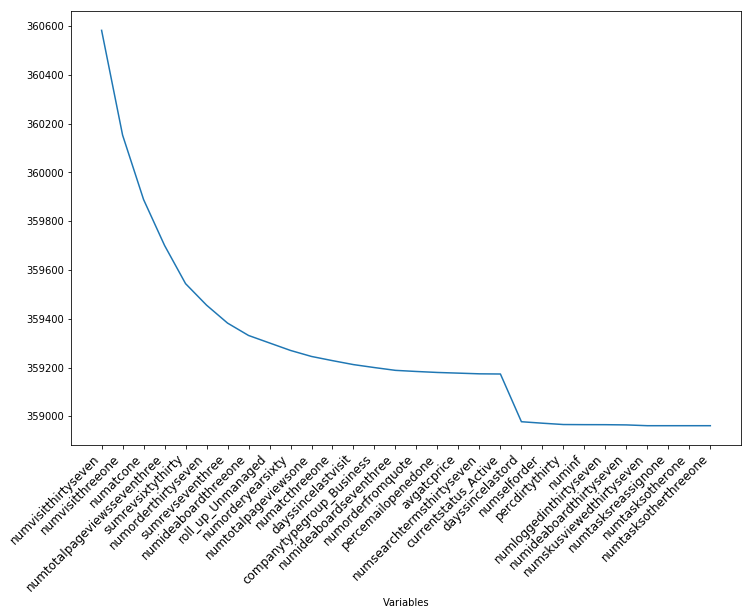

In [48]:
revenue_best_variables, revenue_bic_list = forwards_stepwise_metric(X, y_revenue, "bic", 30)
plot_metric(revenue_best_variables, revenue_bic_list)

In [ ]:
revenue_best_variables, revenue_r2_list = forwards_stepwise_metric(X, y_revenue, "r2_adj", 30)
plot_metric(revenue_best_variables, revenue_r2_list)

# Conversion Feature Selection


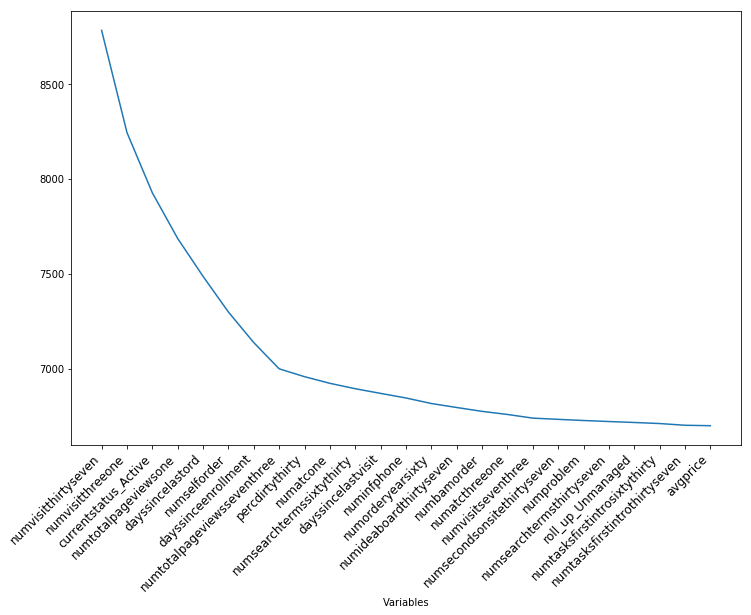

In [164]:
conversion_best_variables, conversion_bic_list = forwards_stepwise_metric(X, y_conversion, "bic", 25)
plot_metric(conversion_best_variables, conversion_bic_list)

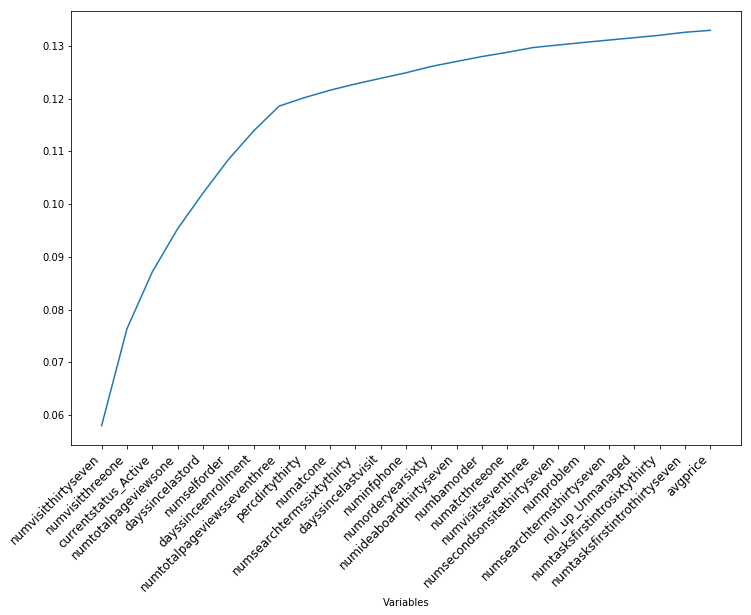

In [165]:
conversion_best_variables, conversion_r2_list = forwards_stepwise_metric(X, y_conversion, "r2_adj", 25)
plot_metric(conversion_best_variables, conversion_r2_list)

# XGB Regression - Revenue

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [51]:
model = xgb.XGBRegressor()
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [52]:
xgb_train = X[revenue_best_variables]

In [53]:
xgb_train.describe().T

,count,mean,std,min,25%,50%,75%,max
numvisitthirtyseven,27813.0,4.139108,8.208265,0.0,0.0,1.0,4.0,197.00
numvisitthreeone,27813.0,0.416100,1.291609,0.0,0.0,0.0,0.0,26.00
numatcone,27813.0,0.028476,0.200625,0.0,0.0,0.0,0.0,5.00
numtotalpageviewsseventhree,27813.0,10.420019,43.657605,0.0,0.0,0.0,1.0,1547.00
sumrevsixtythirty,27813.0,47.678370,292.986400,0.0,0.0,0.0,0.0,13795.47
numorderthirtyseven,27813.0,0.112142,0.426928,0.0,0.0,0.0,0.0,8.00
sumrevseventhree,27813.0,12.289483,153.092056,0.0,0.0,0.0,0.0,8701.00
numideaboardthreeone,27813.0,0.027074,0.225210,0.0,0.0,0.0,0.0,9.00
roll_up_Unmanaged,27813.0,0.527739,0.499239,0.0,0.0,1.0,1.0,1.00
numorderyearsixty,27813.0,1.106497,1.176416,0.0,1.0,1.0,1.0,57.00


In [55]:
X_train, X_test, y_train, y_test = train_test_split(xgb_train, y_revenue, test_size=0.25)

In [56]:
model.fit(X_train, y_train)

/Users/kylemaxwell/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:10:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 59.2803914473317
Mean Squared Error: 23176.491305665986
Root Mean Squared Error: 152.23827148803937


In [59]:
pd.DataFrame(y_pred, y_test).reset_index()

,revenue_30,0
0,0.00,7.595659
1,0.00,13.329184
2,0.00,4.912114
3,0.00,40.088745
4,0.00,12.619726
5,0.00,4.912114
6,229.98,4.912114
7,0.00,18.995125
8,0.00,27.942083
9,0.00,59.838459


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3b985fd0>]],
      dtype=object)

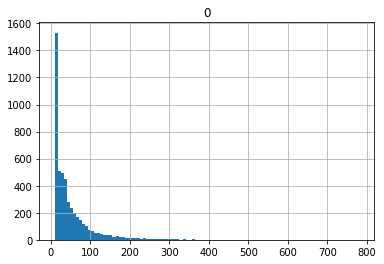

In [66]:
pd.DataFrame(y_pred[y_pred>10]).hist(bins=100, )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c384df550>]],
      dtype=object)

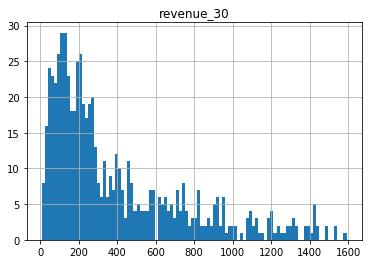

In [62]:
pd.DataFrame(y_test[y_test>0]).hist(bins=100)

# XGB Classification - Conversion

In [166]:
import xgboost as xgb
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

In [167]:
xgb_train = X[conversion_best_variables]

In [183]:
df = X[conversion_best_variables[:8]]
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

pd.Series((np.abs(stats.zscore(df)) < 3).all(axis=1)).value_counts()


True     25835
False     1978
dtype: int64

In [142]:
xgb_train.describe(percentiles=[0.01, 0.25, 0.50, 0.75, .99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
numvisitthirtyseven,27813.0,4.139108,8.208265,0.00,0.000000,0.000000,1.000000,4.000,39.0000,197.000000
numvisitthreeone,27813.0,0.416100,1.291609,0.00,0.000000,0.000000,0.000000,0.000,6.0000,26.000000
currentstatus_Active,27813.0,0.350340,0.477085,0.00,0.000000,0.000000,0.000000,1.000,1.0000,1.000000
numtotalpageviewsone,27813.0,2.814152,17.505051,0.00,0.000000,0.000000,0.000000,0.000,68.0000,1037.000000
dayssincelastord,27813.0,681.811096,441.530484,1.00,2.000000,114.000000,1000.000000,1000.000,1000.0000,1000.000000
numselforder,27813.0,1.309064,1.379611,0.00,0.000000,1.000000,1.000000,1.000,7.0000,58.000000
dayssinceenrollment,27813.0,98.354870,74.920355,0.00,0.000000,25.000000,105.000000,150.000,281.0000,319.000000
numtotalpageviewsseventhree,27813.0,10.420019,43.657605,0.00,0.000000,0.000000,0.000000,1.000,199.8800,1547.000000
percdirtythirty,27813.0,0.020637,0.135338,0.00,0.000000,0.000000,0.000000,0.000,1.0000,1.000000
numatcone,27813.0,0.028476,0.200625,0.00,0.000000,0.000000,0.000000,0.000,1.0000,5.000000


In [74]:
X_train, X_test, y_train, y_test = train_test_split(xgb_train, y_conversion, test_size=0.25)

In [133]:
model = xgb.XGBClassifier(scale_pos_weight=4)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=4, seed=None, silent=None,
       subsample=1, verbosity=1)

In [134]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [135]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.91%


In [137]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
print("Labels:       0, 1")
print("Precision:  ", precision)
print("Recall:     ", recall)
print("F1:         ", f1)
print("Support:    ", support)
print("Pred Count: ", pd.Series(y_pred).value_counts().values)

Labels:       0, 1
Precision:   [0.93988627 0.32415519]
Recall:      [0.91462451 0.41176471]
F1:          [0.92708333 0.3627451 ]
Support:     [6325  629]
Pred Count:  [6155  799]


In [58]:
import xgboost as xgb

train = pd.get_dummies(train).reset_index()
X = train.drop(['cuid', 'convert_30', 'revenue_30'], axis='columns', errors='ignore')

X_train, y_train = X, train.convert_30
conversion_model = xgb.XGBClassifier(scale_pos_weight=4)
conversion_model.fit(X_train, y_train)
xgb_features = pd.DataFrame(conversion_model.feature_importances_, X_train.columns).sort_values(0, ascending=False)


In [60]:
top_20 = xgb_features[:20]
xgb_train = X[top_20.index]

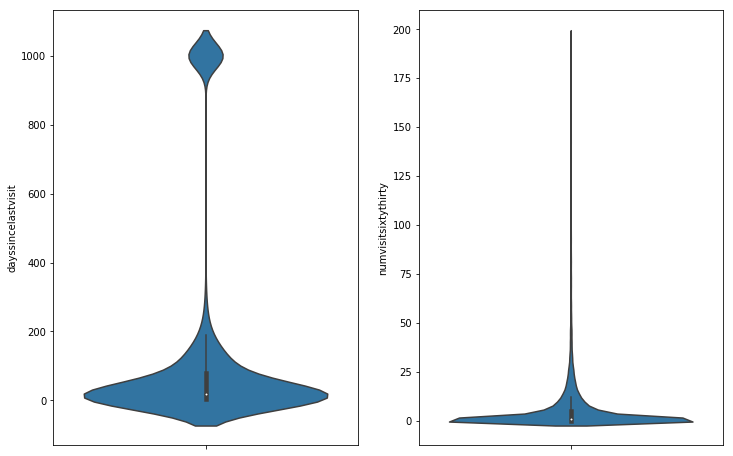

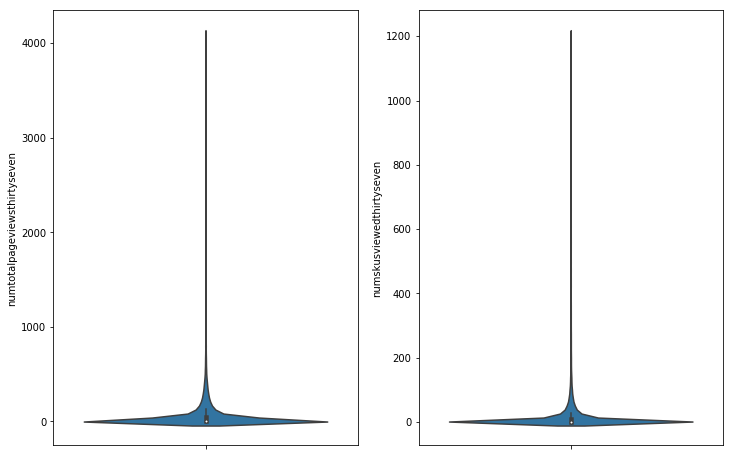

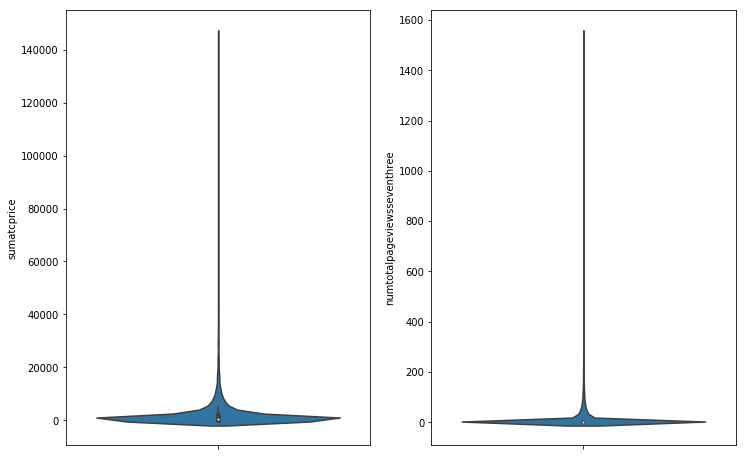

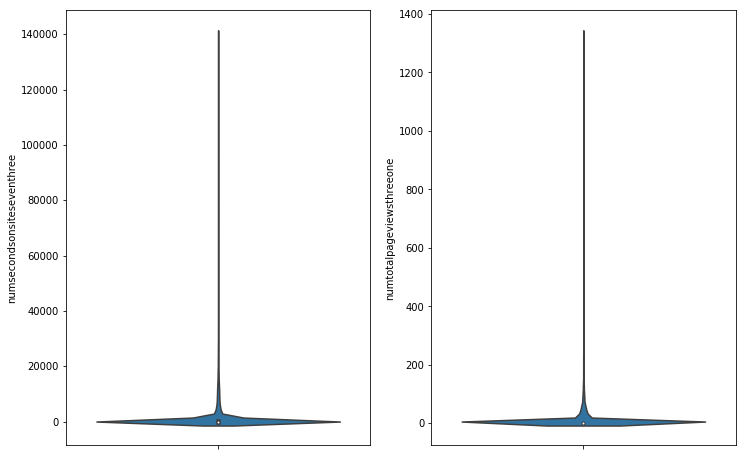

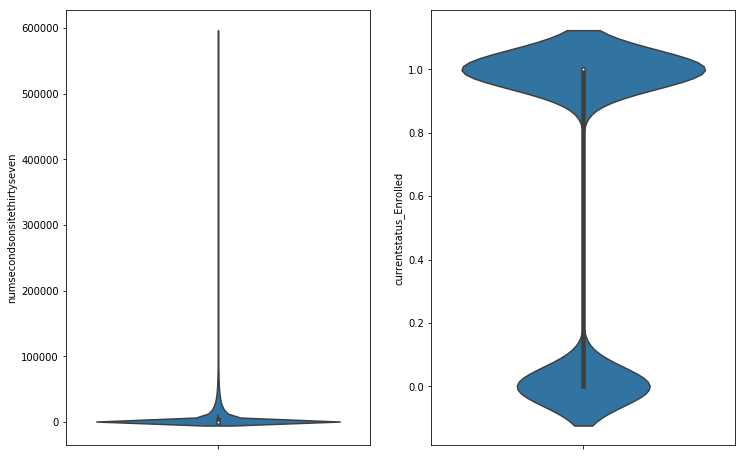

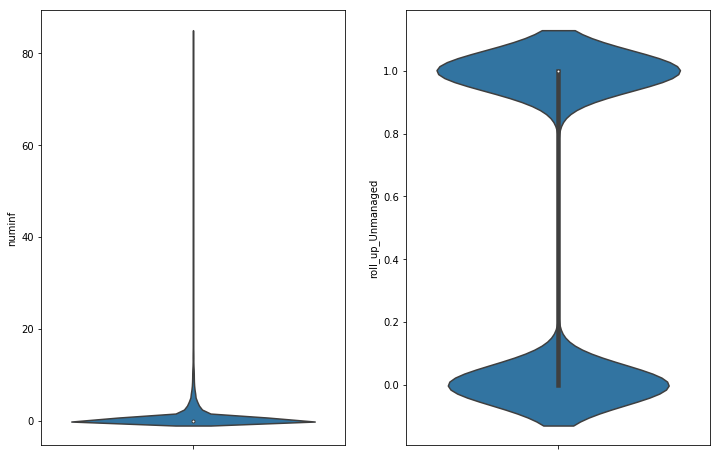

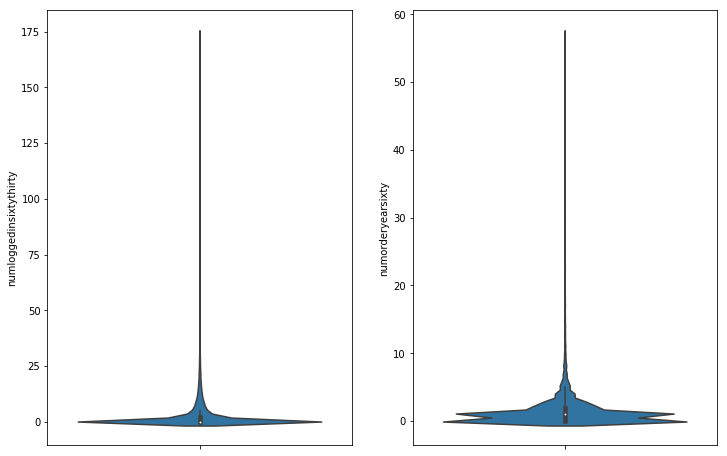

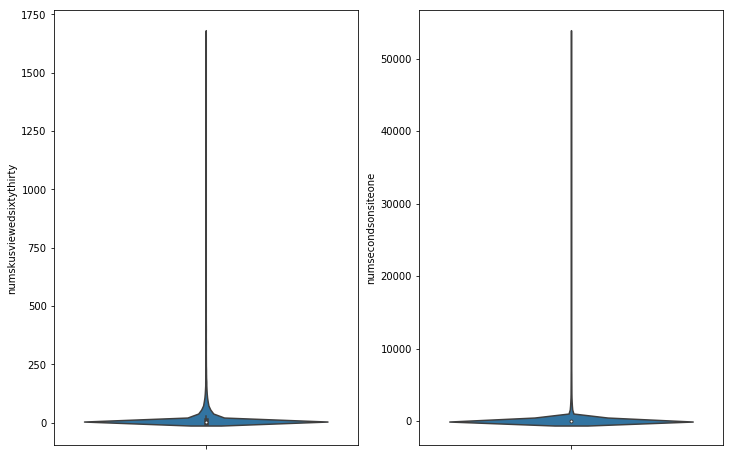

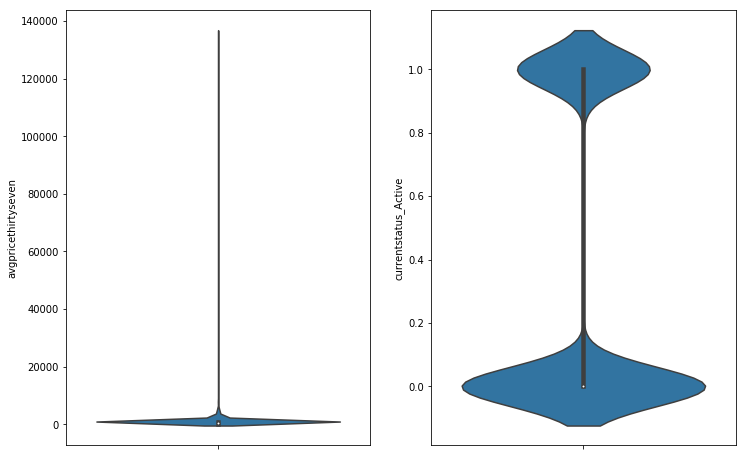

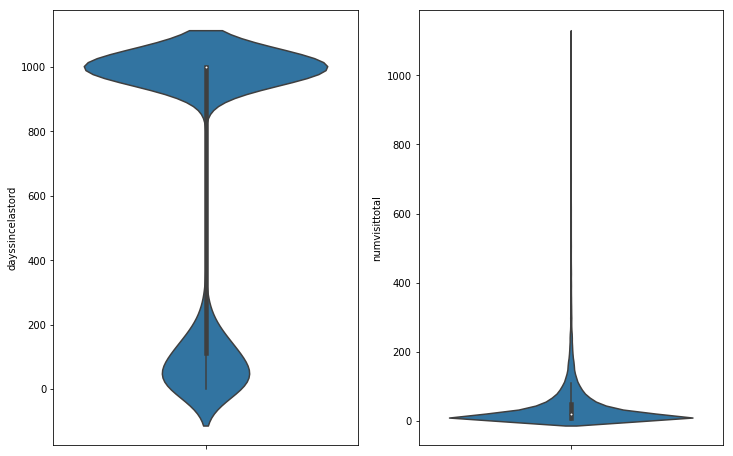

In [63]:
import seaborn as sns
numeric = xgb_train.dtypes[train.dtypes != 'object'].index
xgb_train[numeric].shape

data = xgb_train[numeric]
n_cols = 2
n_rows = data.shape[1] // n_cols
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=data.columns[i*n_cols+j], data=data, ax=ax[j])

In [64]:
data.skew()

dayssincelastvisit               2.624313
numvisitsixtythirty              4.568734
numtotalpageviewsthirtyseven     7.662590
numskusviewedthirtyseven         8.479882
sumatcprice                      9.119465
numtotalpageviewsseventhree      9.876599
numsecondsonsiteseventhree       8.119084
numtotalpageviewsthreeone       11.443295
numsecondsonsitethirtyseven      8.534247
currentstatus_Enrolled          -0.615462
numinf                           9.413519
roll_up_Unmanaged               -0.097540
numloggedinsixtythirty           5.874700
numorderyearsixty                5.921156
numskusviewedsixtythirty        10.892317
numsecondsonsiteone              9.575486
avgpricethirtyseven             61.583736
currentstatus_Active             0.616928
dayssincelastord                -0.673410
numvisittotal                    3.988286
dtype: float64

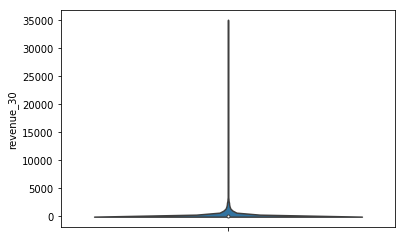

In [67]:
data = pd.read_csv('df_training_scholarjet.csv', index_col='cuid').drop('Unnamed: 0', axis='columns')
sns.violinplot(y='revenue_30', data=data)

In [68]:
data.revenue_30.skew()

25.607792945666375